<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-5530-1658802762/blob/main/Assignments/Ana/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement: Abalone Age Prediction**

**Description:-**

Predicting the age of abalone from physical measurements. The age of abalone is
determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

**Attribute Information:**

Given is the attribute name, attribute type, measurement unit, and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description

1- Sex / nominal / -- / M, F, and I (infant)

2- Length / continuous / mm / Longest shell 

3- Diameter / continuous / mm / perpendicular to 

4- Height / continuous / mm / with meat in shell

5- Whole weight / continuous / grams / whole abalone

6- Shucked weight / continuous / grams / weight of meat

7- Viscera weight / continuous / grams / gut weight (after bleeding)

8- Shell weight / continuous / grams / after being dried

9- Rings / integer / -- / +1.5 gives the age in years

**Building a Regression Model**
1. Download the dataset: Dataset

2. Load the dataset into the tool.

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#warning hadle
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


3. Perform Below Visualizations.
* Univariate Analysis

In [3]:
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

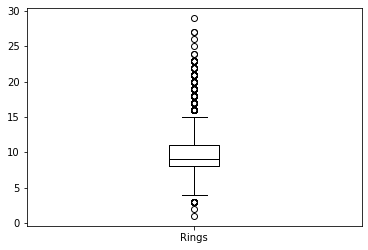

In [4]:
data.boxplot(column=['Rings'], grid=False, color='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fc6b12650>]],
      dtype=object)

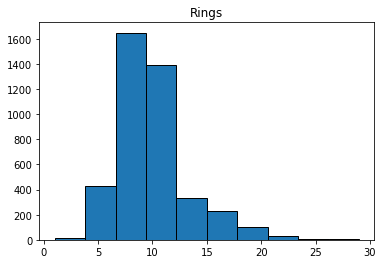

In [5]:
data.hist(column='Rings', grid=False, edgecolor='black')

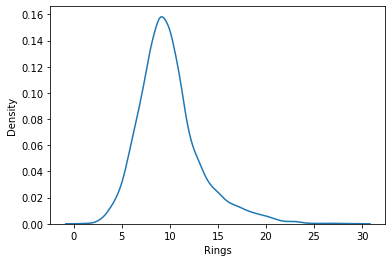

In [6]:
sns.kdeplot(data['Rings'])

* Bi-Variate Analysis

Text(0, 0.5, 'Diameter')

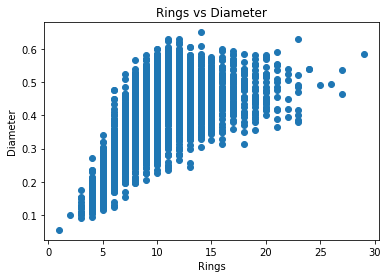

In [7]:
plt.scatter(data.Rings, data.Diameter)
plt.title('Rings vs Diameter')
plt.xlabel('Rings')
plt.ylabel('Diameter')

In [8]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


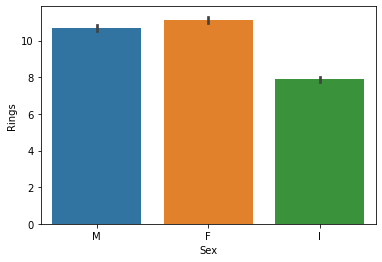

In [9]:
sns.barplot(x='Sex',y='Rings',data=data)

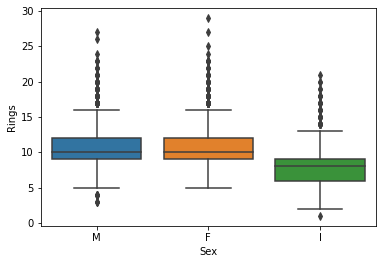

In [10]:
sns.boxplot(x='Sex',y='Rings',data=data)

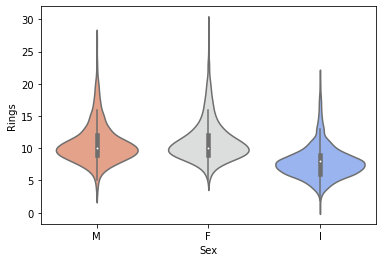

In [11]:
sns.violinplot(x='Sex',y='Rings',data=data, palette='coolwarm_r')

* Multi-Variate Analysis

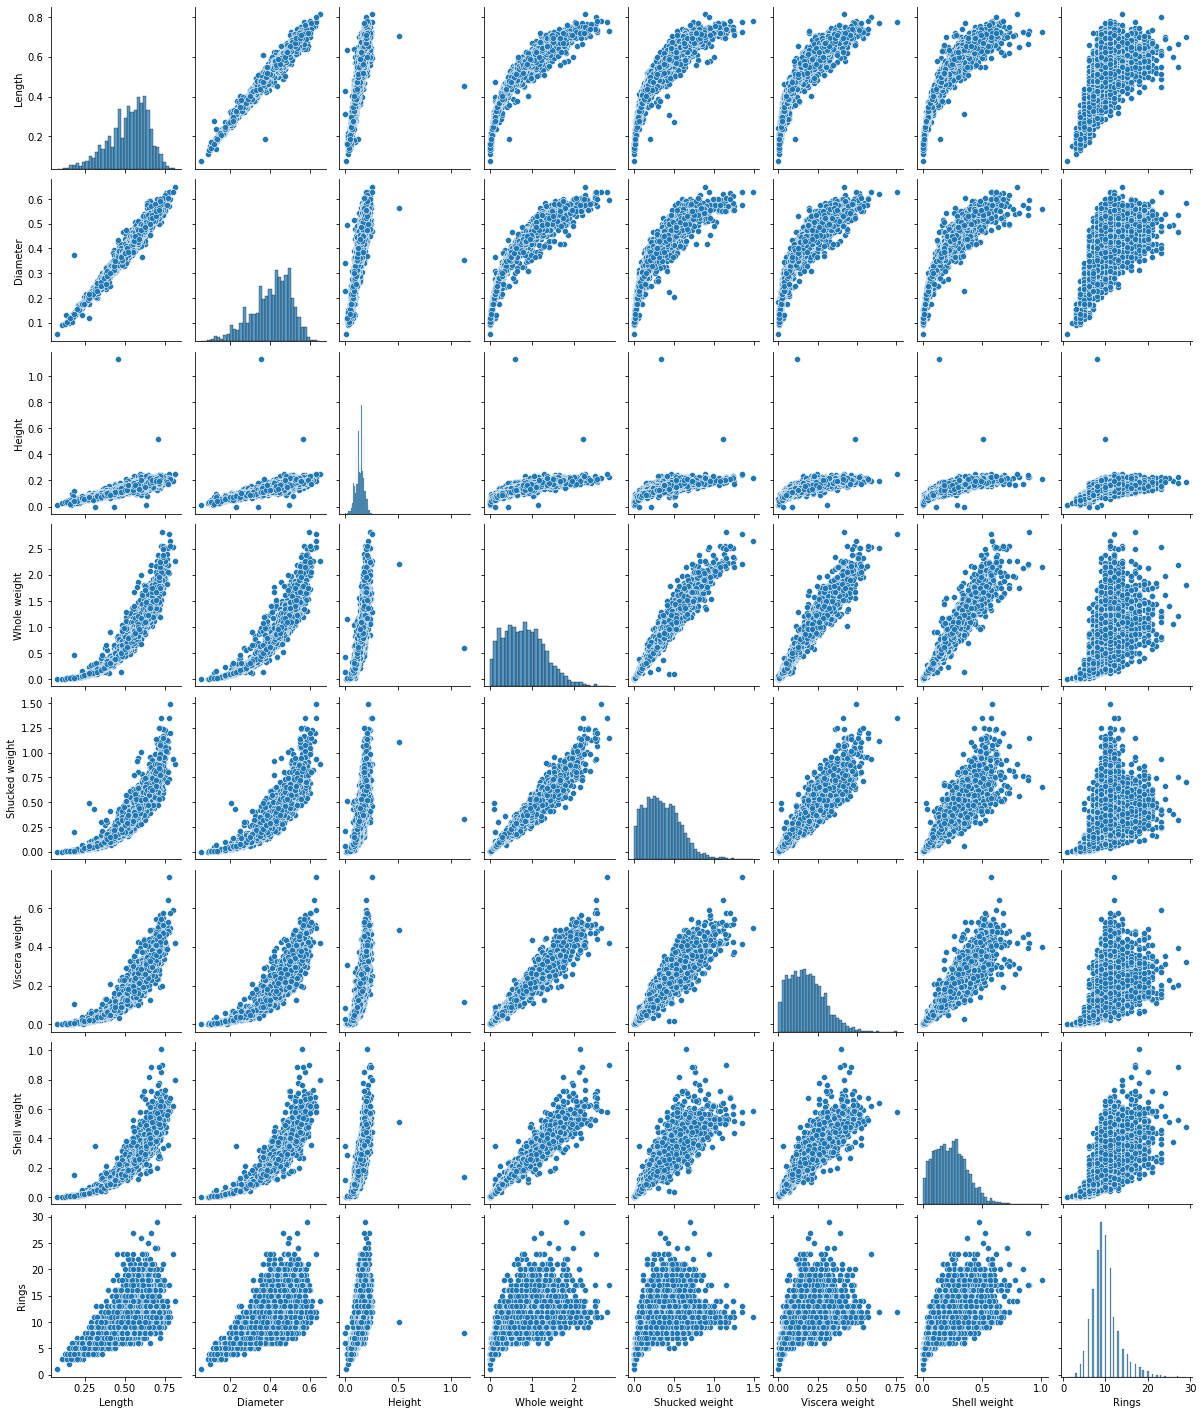

In [12]:
sns.pairplot(
    data=data, 
    aspect=.85);

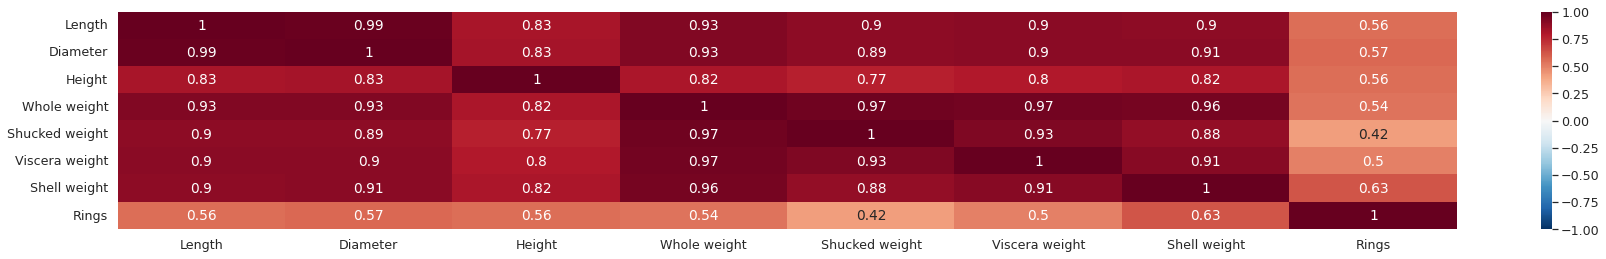

In [13]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30,4))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

Text(0, 0.5, 'Diameter')

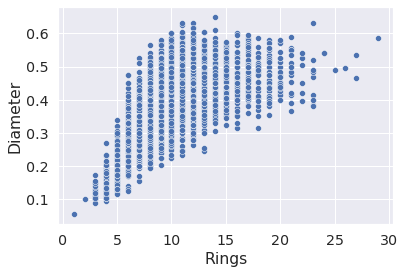

In [14]:
sns.set(font_scale=1.3)
sns.scatterplot(
   x='Rings',y='Diameter',data=data)
plt.xlabel(
    'Rings')
plt.ylabel(
    'Diameter')

4. Perform descriptive statistics on the dataset.

In [15]:
data['Rings'].mean()

9.933684462532918

In [16]:
data['Rings'].median()

9.0

In [17]:
data['Rings'].std()

3.2241690320681284

In [18]:
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

5. Check for Missing values and deal with them.

In [19]:
data.isnull().sum().sum()

0

6. Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


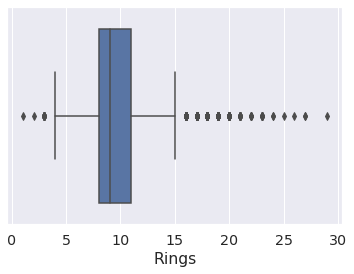

In [20]:
sns.boxplot(data['Rings'],data=data)

In [21]:
data['Rings'].skew()

1.114101898355677

In [22]:
Q1=data['Rings'].quantile(0.25)
Q3=data['Rings'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

3.0


In [23]:
Q1=data['Rings'].quantile(0.25)
Q3=data['Rings'].quantile(0.75)
IQR=Q3-Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Rings']=np.where((data['Rings'])>upper_whisker,upper_whisker,np.where(data['Rings']<lower_whisker,lower_whisker,data['Rings']))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


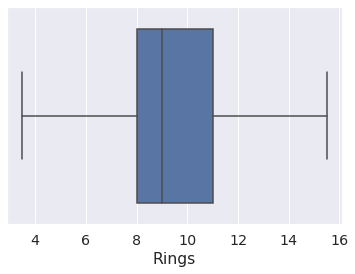

In [24]:
sns.boxplot(data['Rings'],data=data)

7. Check for Categorical columns and perform encoding. 

In [25]:
data_numeric = data[['Length','Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight','Rings']]
data_categorical = data[['Sex']]

In [26]:
data_numeric.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [27]:
data_categorical.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [28]:
from sklearn.preprocessing import OneHotEncoder

Gender_encoder = OneHotEncoder()
Gender_reshaped = np.array(data_categorical['Sex']).reshape(-1, 1)
Gender_values = Gender_encoder.fit_transform(Gender_reshaped)

print(data_categorical['Sex'][:5])
print()
print(Gender_values.toarray()[:5])
print()
print(Gender_encoder.inverse_transform(Gender_values)[:5])

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

[['M']
 ['M']
 ['F']
 ['M']
 ['I']]


In [29]:
from sklearn.preprocessing import LabelEncoder

Gender_encoder = LabelEncoder()
Gender_values = Gender_encoder.fit_transform(data_categorical['Sex'])

print("Before Encoding:", list(data_categorical['Sex'][:5]))
print("After Encoding:", Gender_values[:5])
print("The inverse from the encoding result:", Gender_encoder.inverse_transform(Gender_values[:5]))

Before Encoding: ['M', 'M', 'F', 'M', 'I']
After Encoding: [2 2 0 2 1]
The inverse from the encoding result: ['M' 'M' 'F' 'M' 'I']


8. Split the data into dependent and independent variables.

In [30]:
X = data.iloc[:, :-1].values
print(X)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [31]:
Y = data.iloc[:, -1].values
print(Y)

[15.  7.  9. ...  9. 10. 12.]


9. Scale the independent variables

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = data[['Length','Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight','Rings']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-0.57455813 -0.43214879 -1.06442415 ... -0.72621157 -0.63821689
   1.89365646]
 [-1.44898585 -1.439929   -1.18397831 ... -1.20522124 -1.21298732
  -1.00079163]
 [ 0.05003309  0.12213032 -0.10799087 ... -0.35668983 -0.20713907
  -0.27717961]
 ...
 [ 0.6329849   0.67640943  1.56576738 ...  0.97541324  0.49695471
  -0.27717961]
 [ 0.84118198  0.77718745  0.25067161 ...  0.73362741  0.41073914
   0.0846264 ]
 [ 1.54905203  1.48263359  1.32665906 ...  1.78744868  1.84048058
   0.80823842]]


10. Split the data into training and testing


In [46]:
#converting categorical values to numbers

to_numeric = {'M': 1.0, 'F': 2.0,
'I': 0.0}

# adding the new numeric values from the to_numeric variable to both datasets
df = data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Gender = pd.to_numeric(df.Sex)

# dropping the previous Dependents column
df.drop(['Sex'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
df = pd.concat([df, Gender], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {df.shape}\n")
print(df.info())

training set (row, col): (4177, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   float64
 8   Sex             4177 non-null   float64
dtypes: float64(9)
memory usage: 293.8 KB
None


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['Rings']
X = df.drop('Rings', axis = 1)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

11. Build the Model

In [57]:
#Linear Regression
LR = LinearRegression()

12. Train the Model



In [60]:
LR.fit(X_train, y_train)

LinearRegression()

13. Test the Model

In [62]:
y_predict = LR.predict(X_test)

14. Measure the performance using Metrics.

In [68]:
LR.score(X_test, y_test)

0.5611220991998995